In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle
with open('dados/depresso.pkl', 'rb') as f:
  X_prev, X_test, y_classe, y_test = pickle.load(f)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
param_distrib = {
    'n_estimators': [80, 100, 120, 140, 160], # Número de árvores
    'max_depth': [8],
    'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8], # Intervalo para o número máximo de features
    'criterion': ['entropy']   # Critérios de divisão
}

In [5]:
modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [6]:
modelo = RandomizedSearchCV(
    modelo_rf, param_distributions=param_distrib,
    n_iter=100, cv=5, scoring='accuracy', random_state=42
)

In [7]:
modelo.fit(X_prev, y_classe)

/home/eduardoavs/PUC/S4/IA/TP/ambiente/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [8],
                                        'max_features': ['sqrt', 'log2', 0.2,
                                                         0.4, 0.6, 0.8],
                                        'n_estimators': [80, 100, 120, 140,
                                                         160]},
                   random_state=42, scoring='accuracy')

In [8]:
melhor_modelo = modelo.best_estimator_

In [9]:
previsoes = melhor_modelo.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.7464633676446304

In [11]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[ 1410,   249],
       [ 4357, 12151]])

0.7464633676446304

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

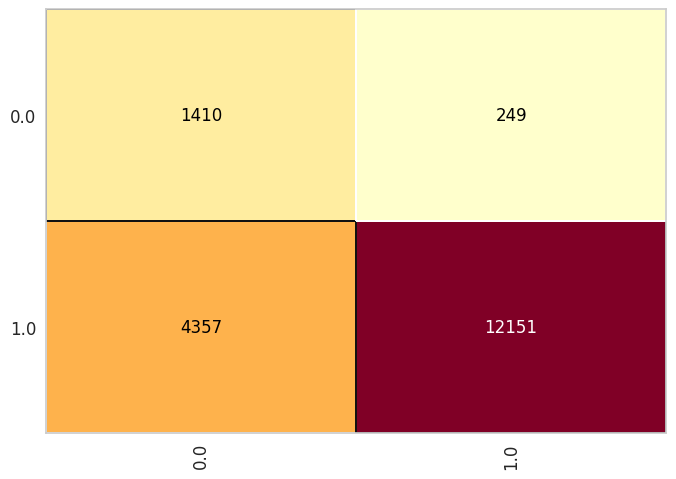

In [12]:
cm = ConfusionMatrix(modelo)
cm.fit(X_prev, y_classe)
cm.score(X_test, y_test)

In [13]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         0.0       0.24      0.85      0.38      1659
         1.0       0.98      0.74      0.84     16508

    accuracy                           0.75     18167
   macro avg       0.61      0.79      0.61     18167
weighted avg       0.91      0.75      0.80     18167



In [14]:
# Criar uma lista com os nomes das features (substitua pelos nomes corretos)
nomes_das_features = ['C009_1',
 'C009_2',
 'C009_3',
 'C011_1.0',
 'C011_2.0',
 'C011_3.0',
 'C011_4.0',
 'C006',
 'C00703',
 'D00901',
 'J007',
 'M01401',
 'M01501',
 'M01601',
 'M01901',
 'N001',
 'N00101',
 'N010',
 'N011',
 'N012',
 'N013',
 'N014',
 'N015',
 'N016',
 'N017',
 'N018',
 'P018',
 'P02002',
 'P02602',
 'P027',
 'P034',
 'P04502',
 'P050',
 'Q120',
 'V00201',
 'V00203',
 'V02802',
 'H001',
 'VDF002']

In [15]:
import shap

# Criar o explainer baseado no modelo Random Forest
explainer = shap.TreeExplainer(melhor_modelo)

# Gerar os valores SHAP para os dados de teste
shap_values = explainer.shap_values(X_test)


In [16]:
print(X_test.shape)  # Deve ter o formato (n_amostras, n_features)
print(shap_values.shape)  # Deve ter o formato (n_amostras, n_features)


(18167, 39)
(18167, 39, 2)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

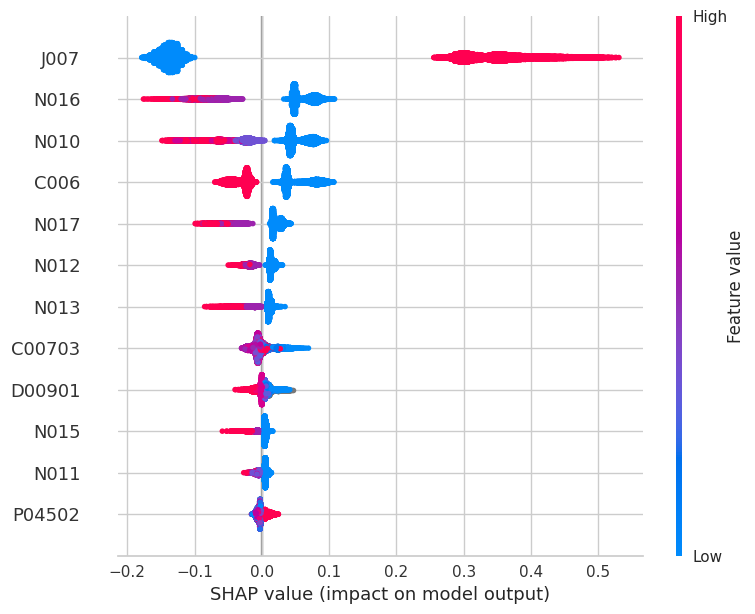

In [17]:
# Selecionar os valores SHAP da classe 1 (índice 1)
shap_values_class_1 = shap_values[:, :, 1]

# Gerar o gráfico de resumo do SHAP com base na classe 1
shap.summary_plot(shap_values_class_1, X_test, feature_names=nomes_das_features, plot_type="dot", color_bar=True, max_display=12)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Variáveis mais relevantes:
J007: 0.45740848933168465
N016: 0.10960642036694468
N010: 0.09165796368680199
N017: 0.04619226201944116
C006: 0.034030311140809656
N012: 0.03054044562809317
C00703: 0.027615137867402606
VDF002: 0.02381995214454397
N013: 0.02364776265915324
D00901: 0.014324096941808093
N015: 0.012399830905090352
N011: 0.010163925037981485
P04502: 0.010140817369863636
H001: 0.009506504263551728
P018: 0.008942005486188663
N00101: 0.008836552299328186
N018: 0.006459278859061525
M01901: 0.006113582851889643
N014: 0.0057388881630617596
P02002: 0.005732780747131824
M01601: 0.005449004129988198
P02602: 0.00531331738437363
M01401: 0.005278452487856435
N001: 0.005023930709135215
M01501: 0.0045189833828962675
C009_1: 0.004368791304779618
C009_2: 0.004242692440572976
P027: 0.0035786398230343943
V00201: 0.0029213511830916664
C011_4.0: 0.0022256185511878137
P034: 0.002164027631687569
V02802: 0.001983675341499785
P050: 0.0019577923235945477
C011_1.0: 0.0019015633680895612
C011_2.0: 0.001866

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

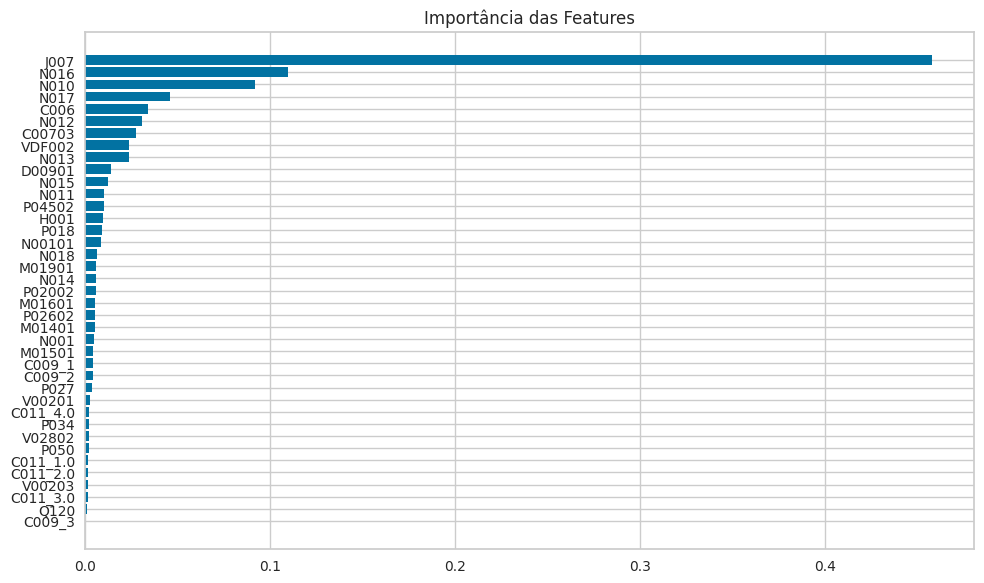

In [18]:
# Obter a importância das features
importancias = melhor_modelo.feature_importances_

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_prev.shape[1]), importancias[indices_ordenados], align="center")
plt.yticks(range(X_prev.shape[1]), [nomes_das_features[i] for i in indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()